<a href="https://colab.research.google.com/github/PHTLing/tlinh-SE-website/blob/main/CS231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import feature
import joblib
import json
import glob
import imutils

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir ="/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train"

In [ ]:
# Tìm kích thước ảnh trung bình
shapes=[]
for folder in os.listdir(dataset_dir):
  curr_folder = os.path.join (dataset_dir, folder)
  for file_name in os.listdir(curr_folder):
    curr_file= os.path.join (curr_folder, file_name)
    img = cv.imread(curr_file)
    shapes.append(img.shape)

widths = [shape[1] for shape in shapes]
height = [shape[0] for shape in shapes]
print('Width average:', sum(widths) / len(shapes))
print('Height average:', sum(height) / len(shapes))

Width average: 622.943848059455
Height average: 575.8571428571429


In [ ]:
from sklearn.model_selection import train_test_split

In [60]:
image=[]
label=[]
for folder in os.listdir(dataset_dir):
  curr_folder = os.path.join(dataset_dir, folder)
  for file_name in os.listdir(curr_folder):
    curr_file = os.path.join(curr_folder, file_name)
    image.append(curr_file)
    label.append(folder)

In [61]:
from sklearn.preprocessing import LabelEncoder

# Tạo output array y
le = LabelEncoder()
le.fit(label)
y = le.transform(label)
y_ind = np.unique(y)
y_dict = dict(zip(y_ind, le.classes_))

In [62]:
y_dict

{0: 'battery', 1: 'biological', 2: 'metal', 3: 'paper', 4: 'plastic'}

In [73]:
data_train,data_test, y_train , y_test = train_test_split ( image, y, test_size=0.2, random_state=42)

In [78]:
temp=data_test #lưu tập đường dẫn test

In [65]:
X_train=[]
for cur_file in data_train:
    img = cv.imread(cur_file)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (320, 300))

    img_blur = cv.GaussianBlur(img, (5,5), 0)  # Thay đổi kích thước kernel và độ mờ tùy vào yêu cầu của bạn

    H = feature.hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                    block_norm='L2-Hys', visualize=False, multichannel=False, transform_sqrt=True)
    X_train.append(np.array(H))

<ipython-input-65-fe240eff9d5b>:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


In [76]:
X_test=[]
for cur_file in data_test:
    img = cv.imread(cur_file)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (320, 300))

    img_blur = cv.GaussianBlur(img, (5,5), 0)  # Thay đổi kích thước kernel và độ mờ tùy vào yêu cầu của bạn

    H = feature.hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                    block_norm='L2-Hys', visualize=False, multichannel=False, transform_sqrt=True)
    X_test.append(np.array(H))

<ipython-input-76-3310ea4f88e0>:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


In [104]:
temp

['/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/plastic/trash33.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/metal/metal160.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/biological/biological537.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/plastic/plastic176.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/metal/metal88.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/paper/00000108.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/metal/metal80.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/plastic/trash43.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/paper/00000254.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/battery/battery129.jpg',
 '/content/drive/MyDri

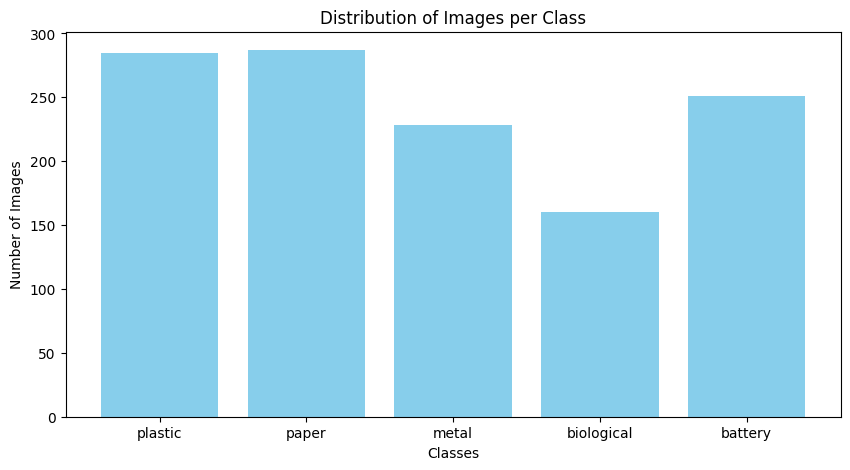

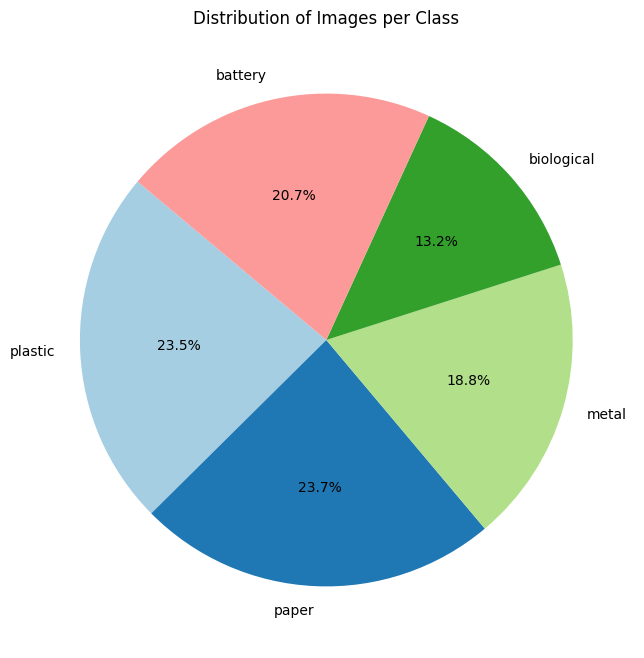

In [79]:
import matplotlib.pyplot as plt
from collections import Counter

# Bước 1: Chuẩn bị dữ liệu
labels = label

# Bước 2: Đếm số lượng hình ảnh trong mỗi lớp
label_counts = Counter(labels)

# Bước 3: Vẽ biểu đồ
# Biểu đồ thanh
plt.figure(figsize=(10, 5))
classes = list(label_counts.keys())
counts = list(label_counts.values())
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.show()

# Biểu đồ hình tròn
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=classes, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(classes))))
plt.title('Distribution of Images per Class')
plt.show()

# **Evaluation**

In [80]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# **K - Nearest Neighbours**

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
Knn_Model = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2)
Knn_Model.fit(X_train, y_train)
y_pred = Knn_Model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.48      0.53      0.51        30
           2       0.79      0.46      0.58        48
           3       0.52      0.67      0.59        64
           4       0.47      0.48      0.47        56

    accuracy                           0.59       243
   macro avg       0.62      0.59      0.60       243
weighted avg       0.62      0.59      0.59       243



In [ ]:
param_grid = {'n_neighbors': [1,5,20,50,100],
              'weights': ['distance','uniform'],
              'algorithm': ['auto'],
              'leaf_size':[30,50],
              'p':[2]
              }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# **SVM**

In [84]:
from sklearn import svm
from sklearn.svm import SVC

svm_model= SVC(kernel='poly', C=1, gamma=1)

In [86]:
svm_model.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='poly')

In [87]:
svm_y_preds= svm_model.predict(X_test)

In [88]:
print(classification_report(y_test,svm_y_preds))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        45
           1       0.85      0.77      0.81        30
           2       0.74      0.60      0.67        48
           3       0.84      0.72      0.77        64
           4       0.59      0.75      0.66        56

    accuracy                           0.74       243
   macro avg       0.76      0.74      0.74       243
weighted avg       0.75      0.74      0.74       243



In [89]:
print(accuracy_score(y_test,svm_y_preds))

0.7366255144032922


# **MLP**

In [91]:
from sklearn.neural_network import MLPClassifier

In [92]:
def MLPmodel(X, y):
  model = MLPClassifier(hidden_layer_sizes = (130, 60), max_iter = 300, random_state = 42, activation = "relu", learning_rate = "constant", solver = "adam", alpha = 0.0001)
  model.fit(X, y)
  joblib.dump(model, 'MLP_model.pkl')

In [93]:
MLPmodel(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [94]:
mlp = joblib.load('MLP_model.pkl')

In [95]:
mlp_y_predicts = mlp.predict(X_test)

In [96]:
print(classification_report(y_test,mlp_y_predicts))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        45
           1       0.88      0.50      0.64        30
           2       0.62      0.38      0.47        48
           3       0.86      0.47      0.61        64
           4       0.43      0.88      0.58        56

    accuracy                           0.62       243
   macro avg       0.72      0.61      0.62       243
weighted avg       0.70      0.62      0.61       243



# **Test**

Test ảnh từ dataset

In [109]:
y_dict

{0: 'battery', 1: 'biological', 2: 'metal', 3: 'paper', 4: 'plastic'}

In [111]:
def test(test_file_dir):
  for i in test_file_dir:
      label = i.split('/')[7]
      img = cv.imread(i)
      img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
      img = cv.resize(img, (320, 300))

      img_blur = cv.GaussianBlur(img, (5,5), 0)  # Thay đổi kích thước kernel và độ mờ tùy vào yêu cầu của bạn

      H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                      block_norm='L2-Hys', visualize=False, multichannel=False, transform_sqrt=True)
      pre=svm_model.predict(np.array(H).reshape(1, -1))
      predict_label=y_dict[pre[0]]
      #Show ảnh
      plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
      plt.title(f"True: {label}\nPred: {predict_label}")
      plt.axis('off')
      plt.show()

In [112]:
temp

['/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/plastic/trash33.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/metal/metal160.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/biological/biological537.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/plastic/plastic176.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/metal/metal88.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/paper/00000108.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/metal/metal80.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/plastic/trash43.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/paper/00000254.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/battery/battery129.jpg',
 '/content/drive/MyDri

In [113]:
import random
test_file_dir=random.sample(temp,10)
test_file_dir

['/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/paper/paper426.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/paper/paper228.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/biological/biological96.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/biological/biological103.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/battery/battery483.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/plastic/plastic386.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/battery/battery282.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/metal/metal151.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/metal/metal52.jpg',
 '/content/drive/MyDrive/Đồ Án Thị Giác Máy Tính/Dataset/Data_train/paper/paper150.jpg']

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


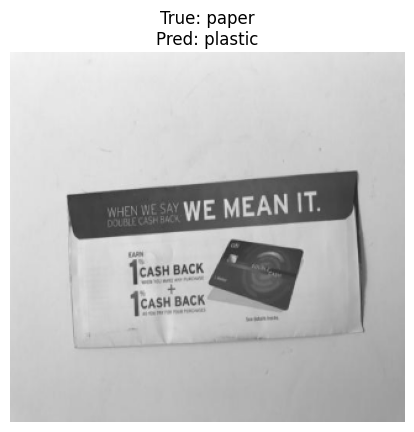

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


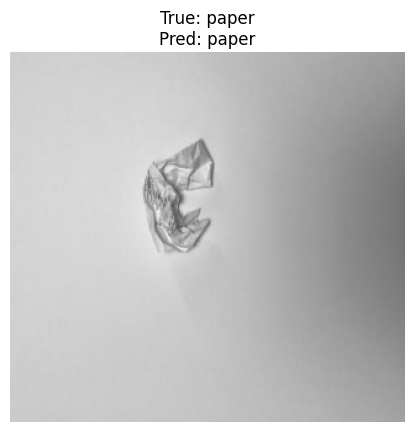

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


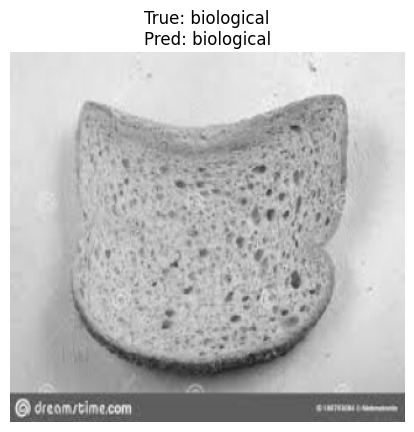

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


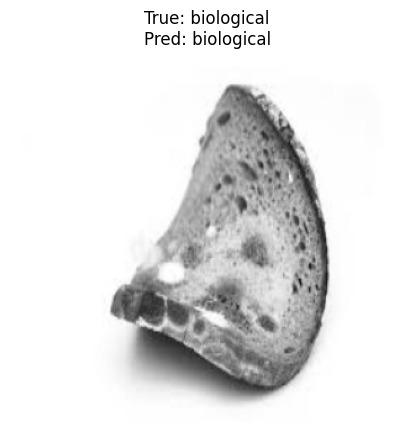

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


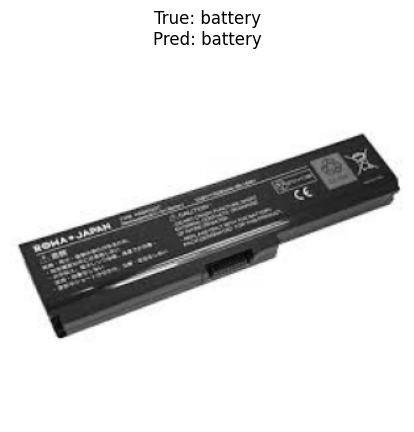

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


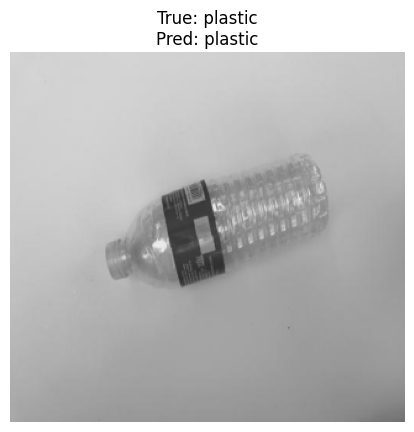

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


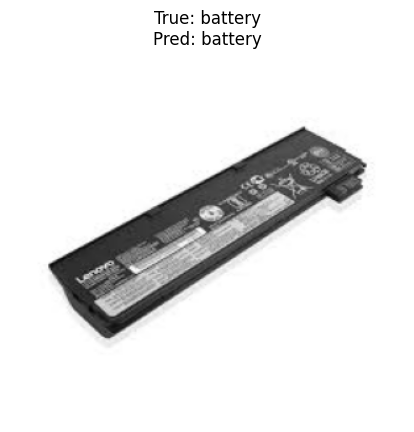

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


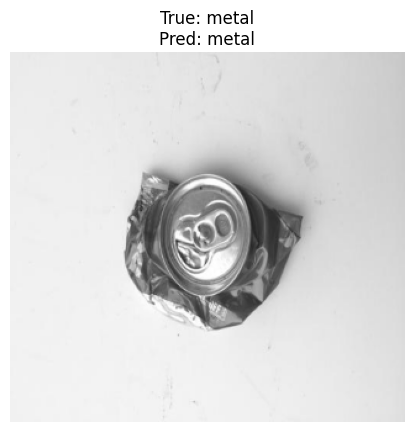

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


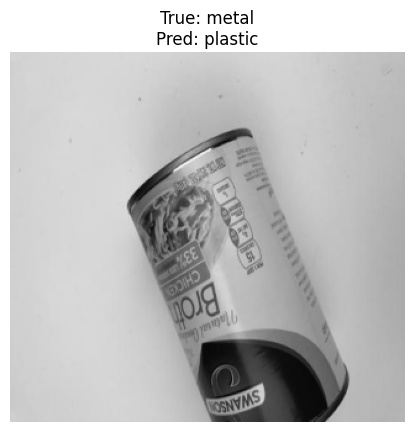

<ipython-input-111-caecc79d4620>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  H = feature.hog(img_blur, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),


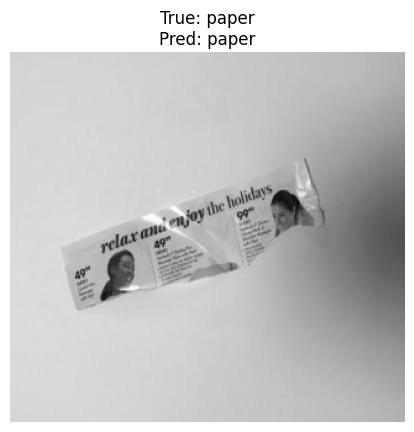

In [114]:
test(test_file_dir)